In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline

In [2]:
%ls

 Volume in drive C is SSD_80GB
 Volume Serial Number is 9279-00B2

 Directory of C:\Users\Alex\Desktop\nyc-health-inspections

06/18/2016  11:31 AM    <DIR>          .
06/18/2016  11:31 AM    <DIR>          ..
06/17/2016  07:59 PM                82 .gitignore
06/18/2016  11:18 AM    <DIR>          .ipynb_checkpoints
06/17/2016  09:25 PM           419,403 big-box-plot.png
06/17/2016  07:59 PM           587,844 big-violin-plot.png
06/17/2016  08:08 PM       163,828,437 DOHMH_New_York_City_Restaurant_Inspection_Results.csv
05/22/2016  11:53 AM        14,261,259 nyc_building_sales.csv
06/18/2016  11:20 AM               581 seaborn_api_continued.ipynb
06/17/2016  11:00 PM         1,023,430 seaborn_api_work.ipynb
               7 File(s)    180,121,036 bytes
               3 Dir(s)   8,252,788,736 bytes free


In [11]:
sales = pd.read_csv("nyc_building_sales.csv", index_col=0)

C:\Users\Alex\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (23,26,28,29,70,71,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
pd.set_option("display.max_columns", 100)

In [14]:
sales.head(1)

,Index,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,ValueRatio
0,0,Bronx,2268,18,1800000,2500,221.538462,201,41,1002,7,8,10454,E083,40,4500,2,1,2A,532 EAST 142 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,C1,2,0,P,"HAXHARI, GAC",2500,8125,0,8125,0,0,0,0,0,0,2,1,4,7,7,25,100,0,0,NaN,2,N,5,2,2197,216878,0,0,2015,NaN,0,0,NaN,NaN,3.25,2.43,0,4.8,2,2022680018,0,41,1007305,234328,6a,NaN,209S029,20901,NaN,0,NaN,1,16v1,143700,620769,2035,0.250462,17.686154,76.402338,2.899629


## jointplot et. al.

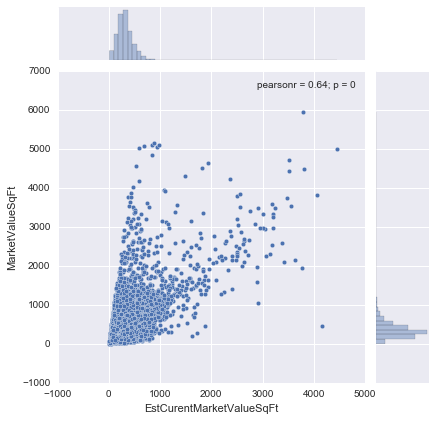

In [76]:
sns.jointplot(x='EstCurentMarketValueSqFt', y='MarketValueSqFt', data=sales, edgecolor="w")

This is the default scatter, you also get some other options.

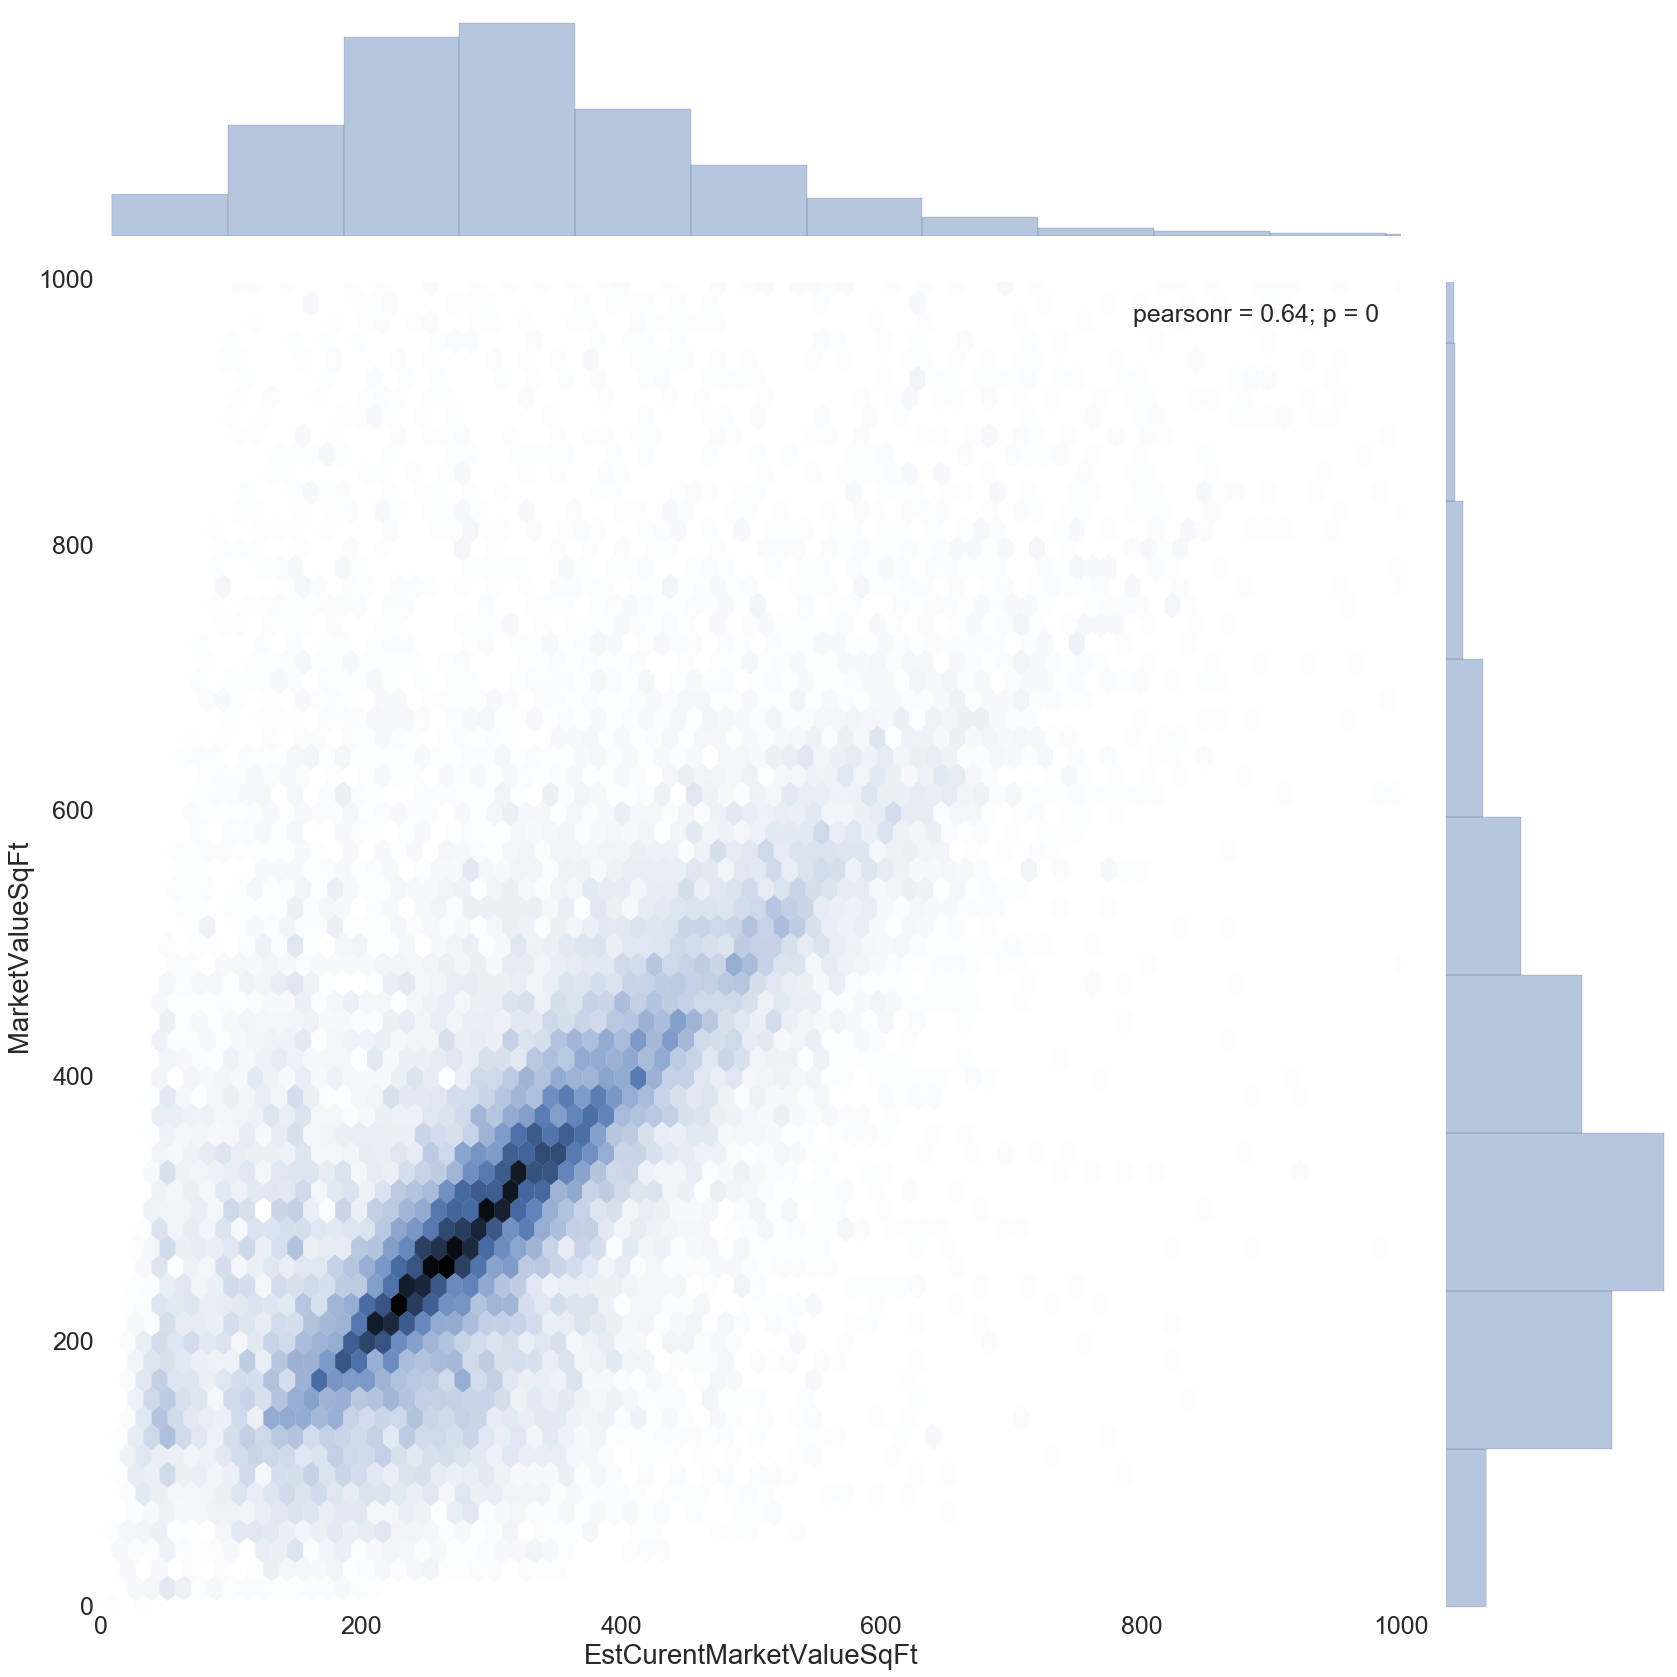

In [48]:
# f, ax = plt.subplots(figsize=(24, 24))
sns.set(font_scale=2.5)
with sns.axes_style("white"):
    sns.jointplot(x='EstCurentMarketValueSqFt',
                  y='MarketValueSqFt',
                  data=sales,
                  kind="hex",
                  size=24, # Must be square!
                  xlim=(0, 1000),
                  ylim=(0, 1000))
# ax.set(xlim=(0, 1000))
sns.despine(top = True, right = True, left = True, bottom = True)

The hex plot is supposed to give you a nice clumped hexagonal plot, but to get it to work I had to additionally restrict the domain in this case, because remember most of these sales are in a very tiny sliver right at the beginning.

I also despines the plot. `sns.despine` removes outer borders, the box around the graphic; it actually (mostly?) works on raw `matplotlib` plots as well.

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


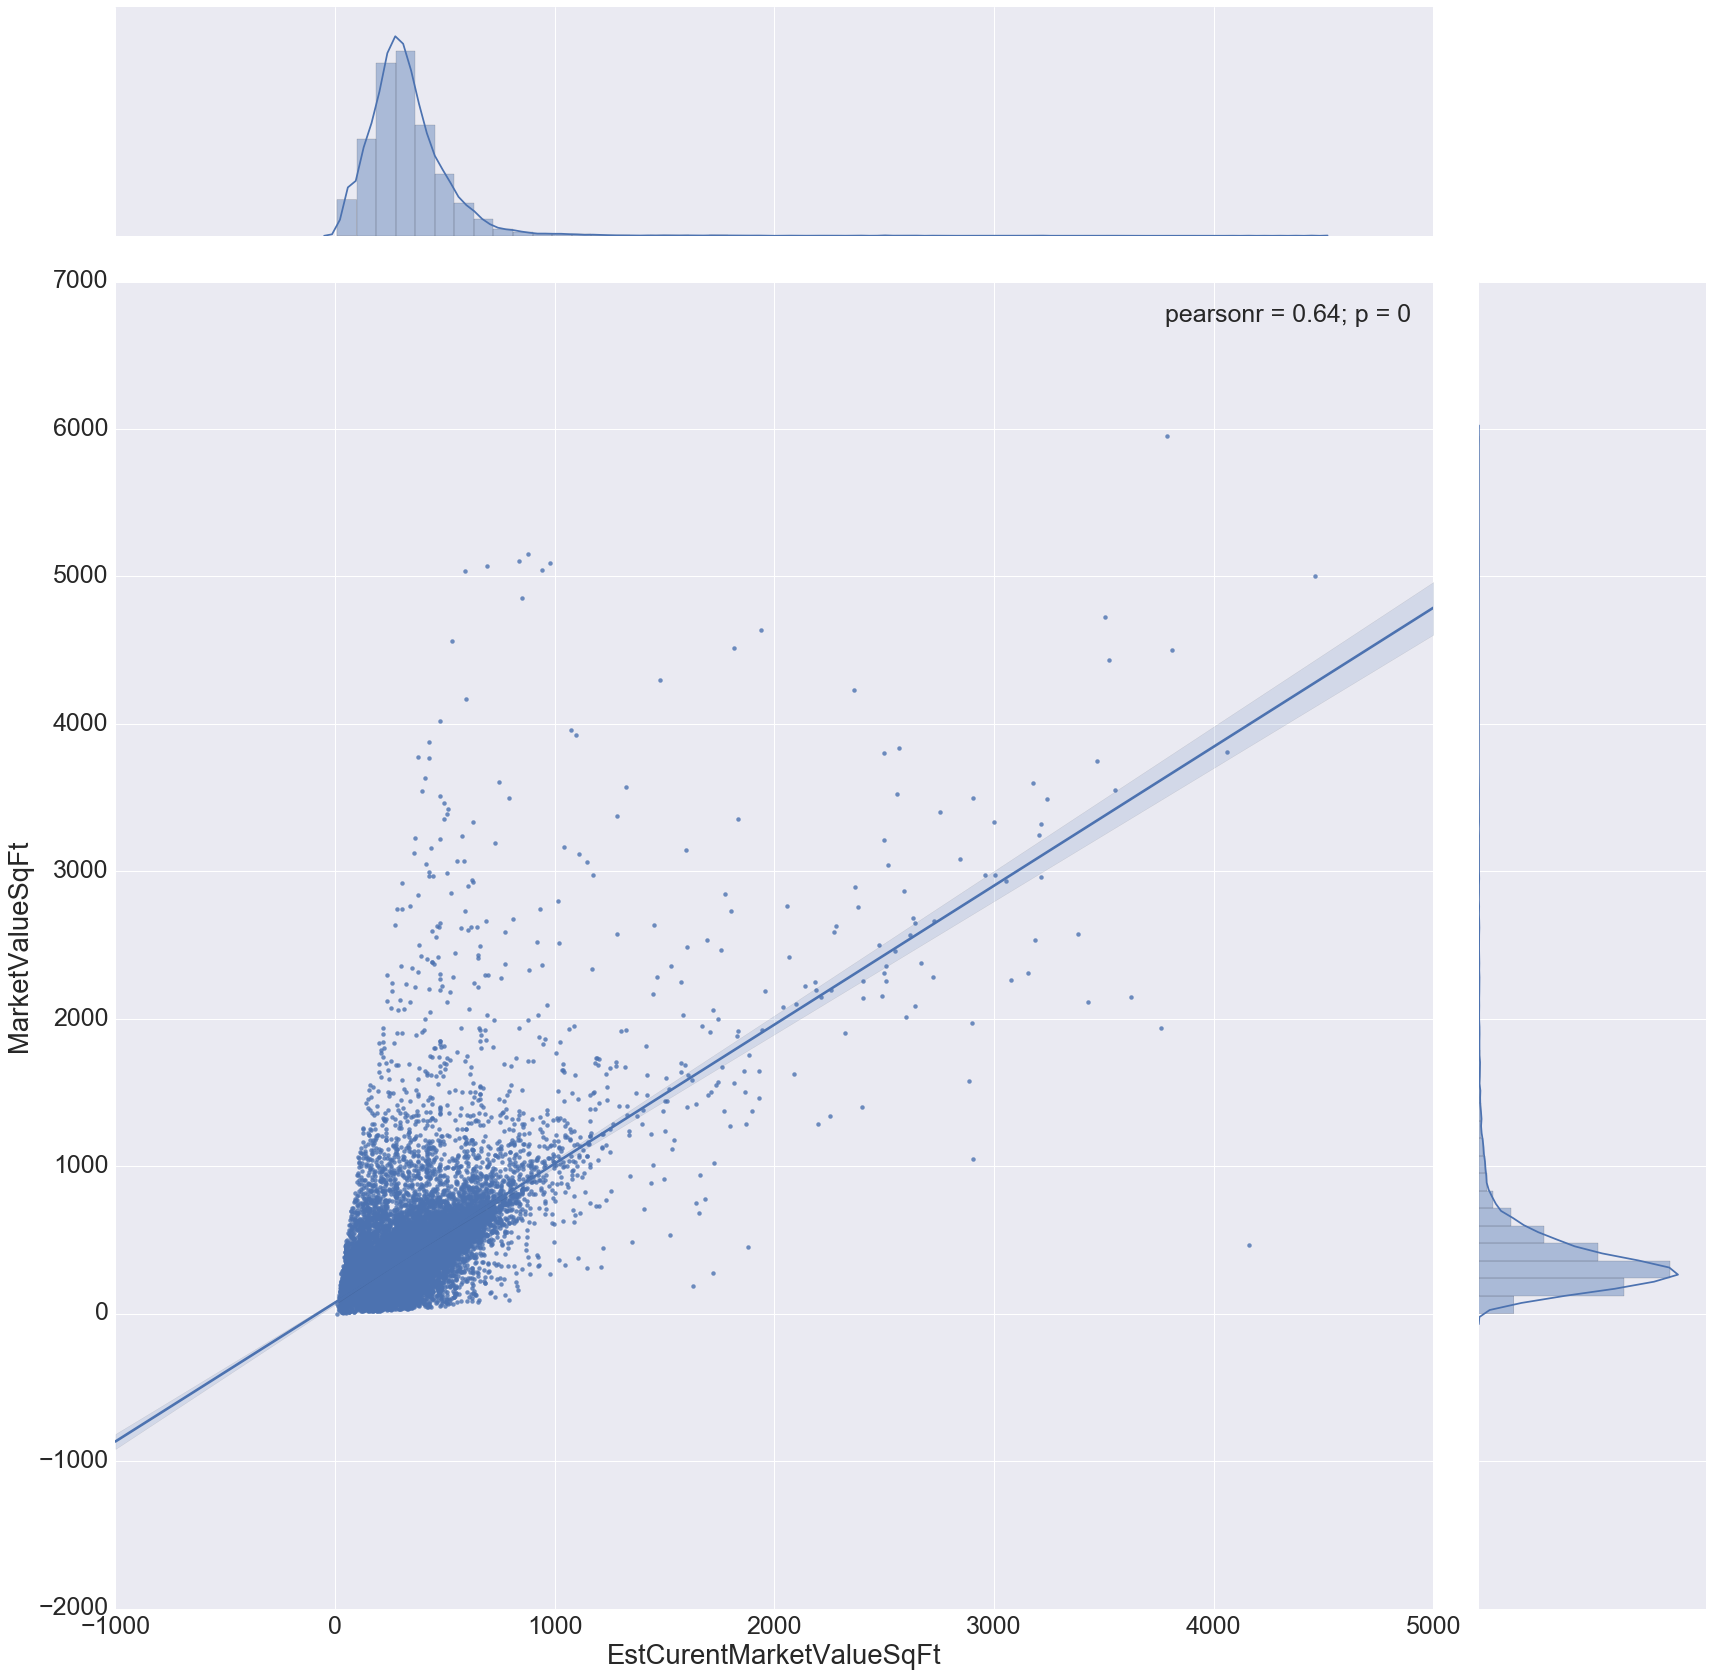

In [78]:
sns.set(font_scale=2.5)
sns.jointplot(x='EstCurentMarketValueSqFt', y='MarketValueSqFt', data=sales, kind='reg', size=24)

^ `kind='reg'` does that.

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


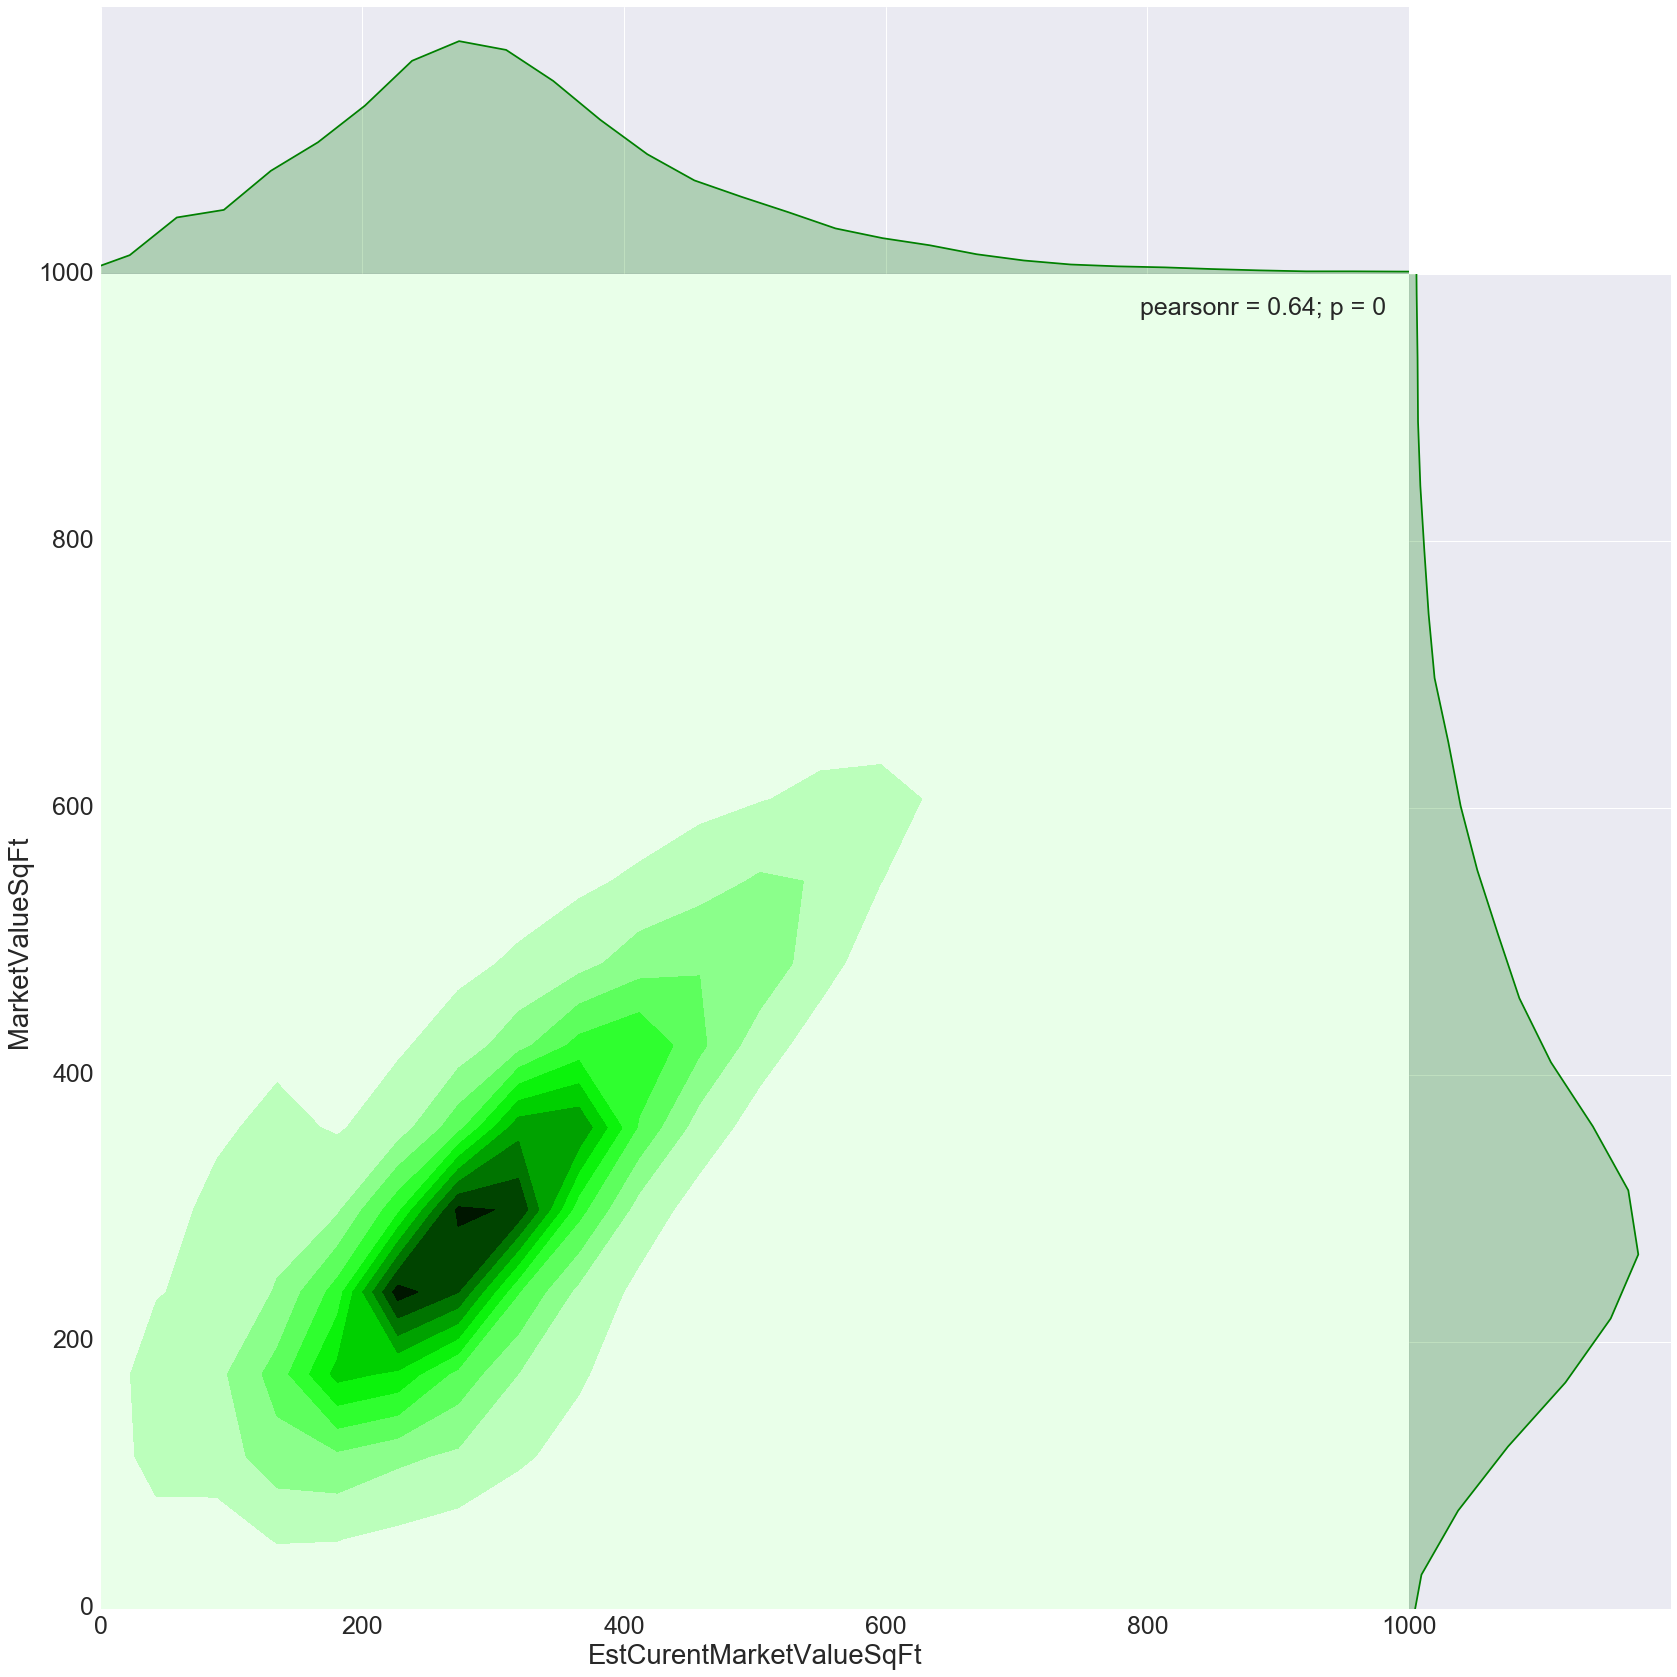

In [52]:
sns.jointplot("EstCurentMarketValueSqFt",
              "MarketValueSqFt",
              data=sales,
              kind="kde",
              space=0,
              color="g",
              size=24,
              xlim=(0, 1000),
              ylim=(0, 1000))

`KDE` bivariate plot. Nice! Notice also `space=0` which moved the side graphs right onto the plot.

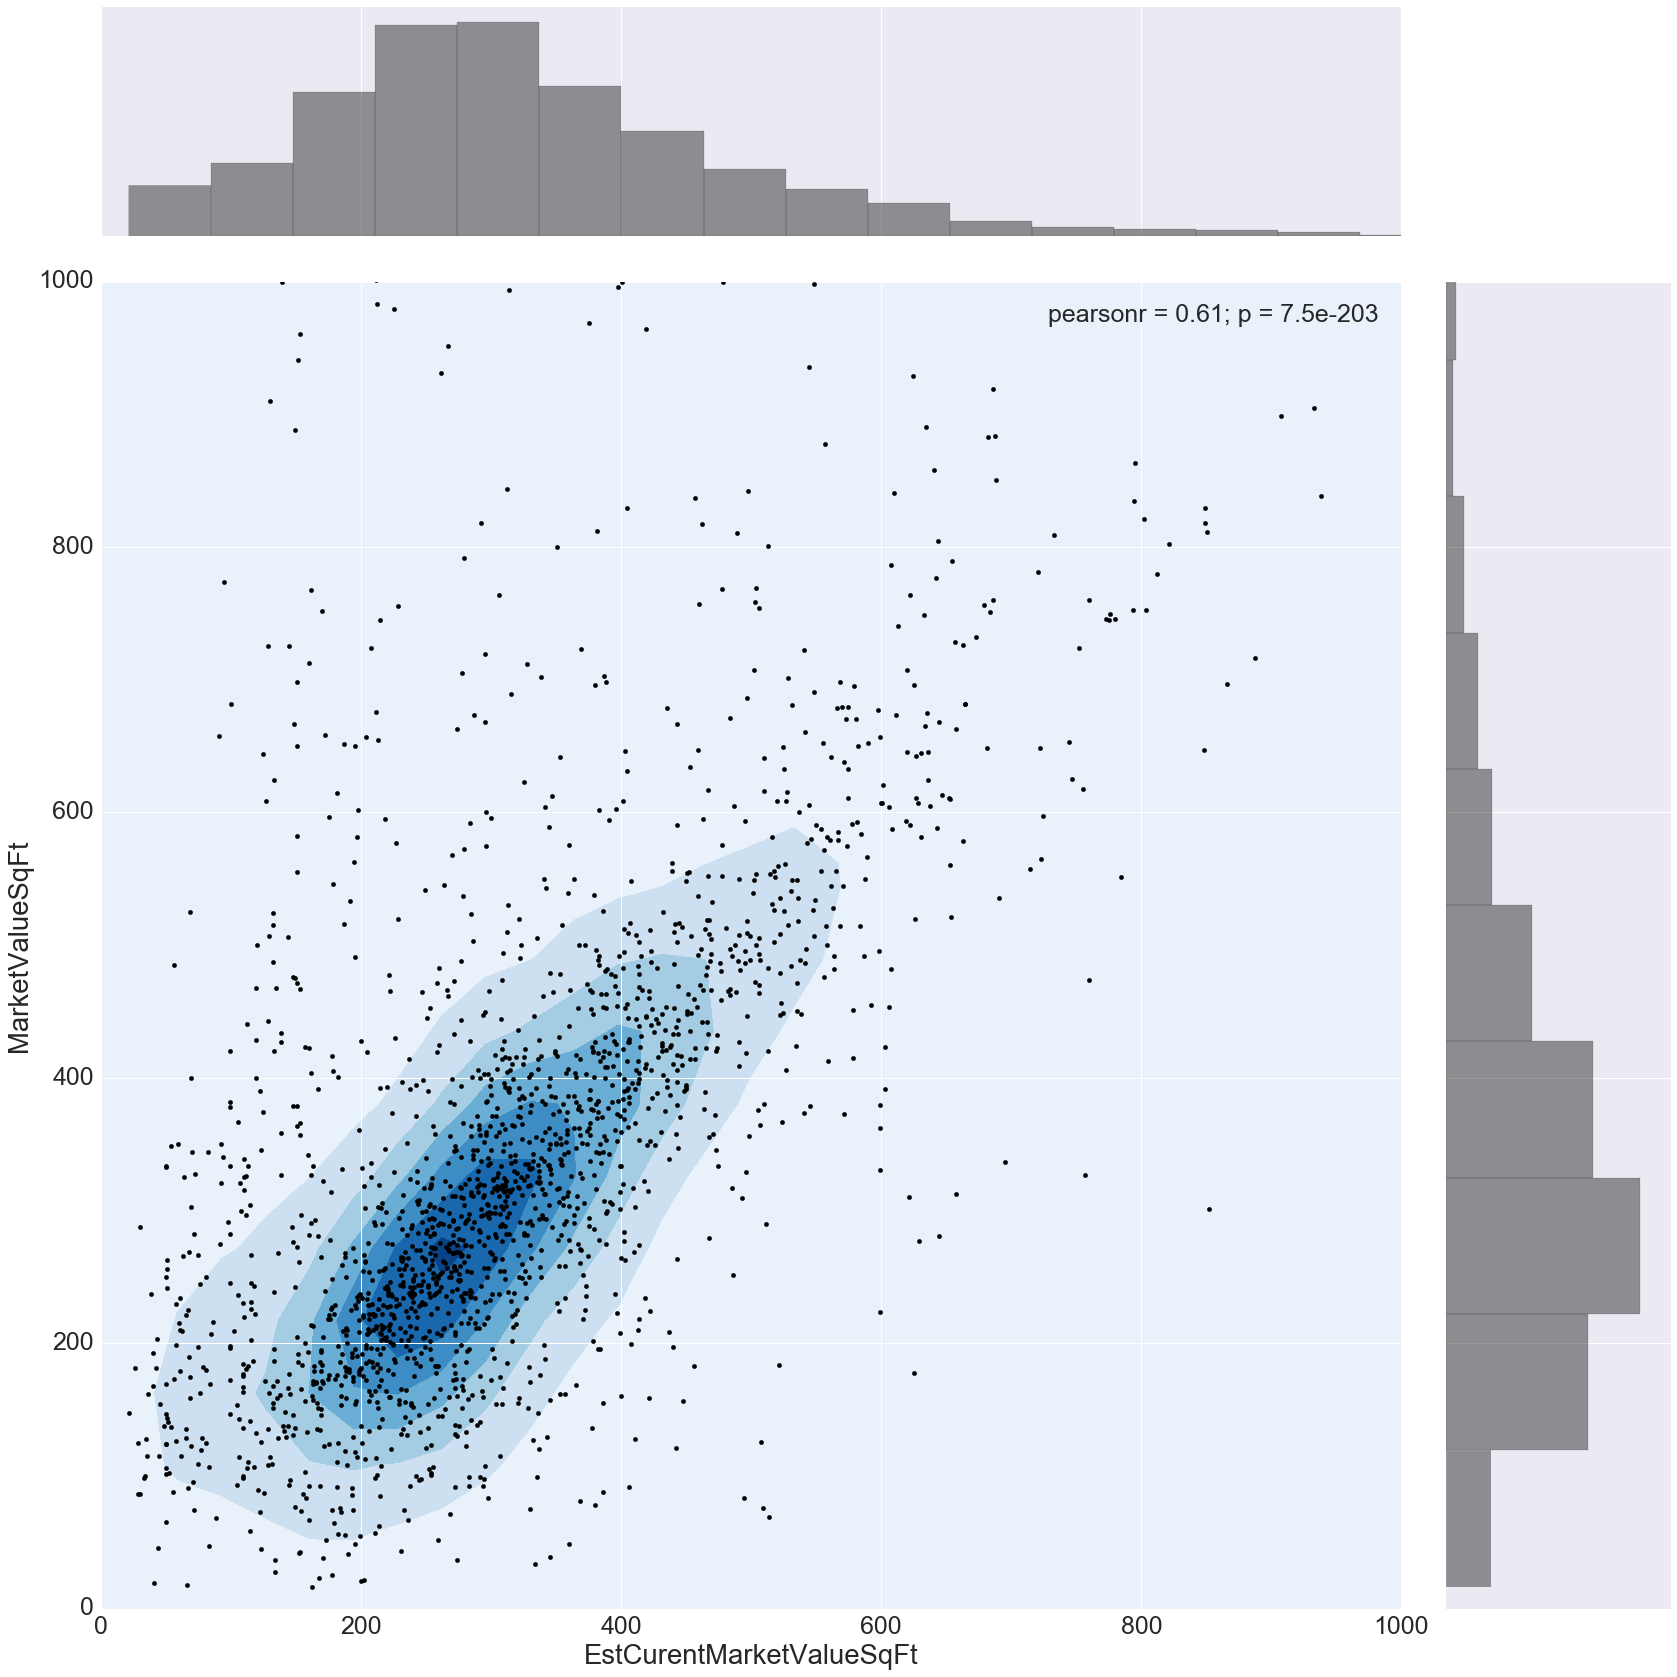

In [58]:
g = (sns.jointplot("EstCurentMarketValueSqFt",
                   "MarketValueSqFt",
                   data=sales.sample(2000),
                   color="k",
                   size=24,
                   xlim=(0, 1000),
                   ylim=(0, 1000)
                  ).plot_joint(sns.kdeplot, zorder=0, n_levels=6, cmap="Blues", shade=True))

Cool here, you can stack plots (just like with `plt.hold()`). You can also use `kdeplot` directly.

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


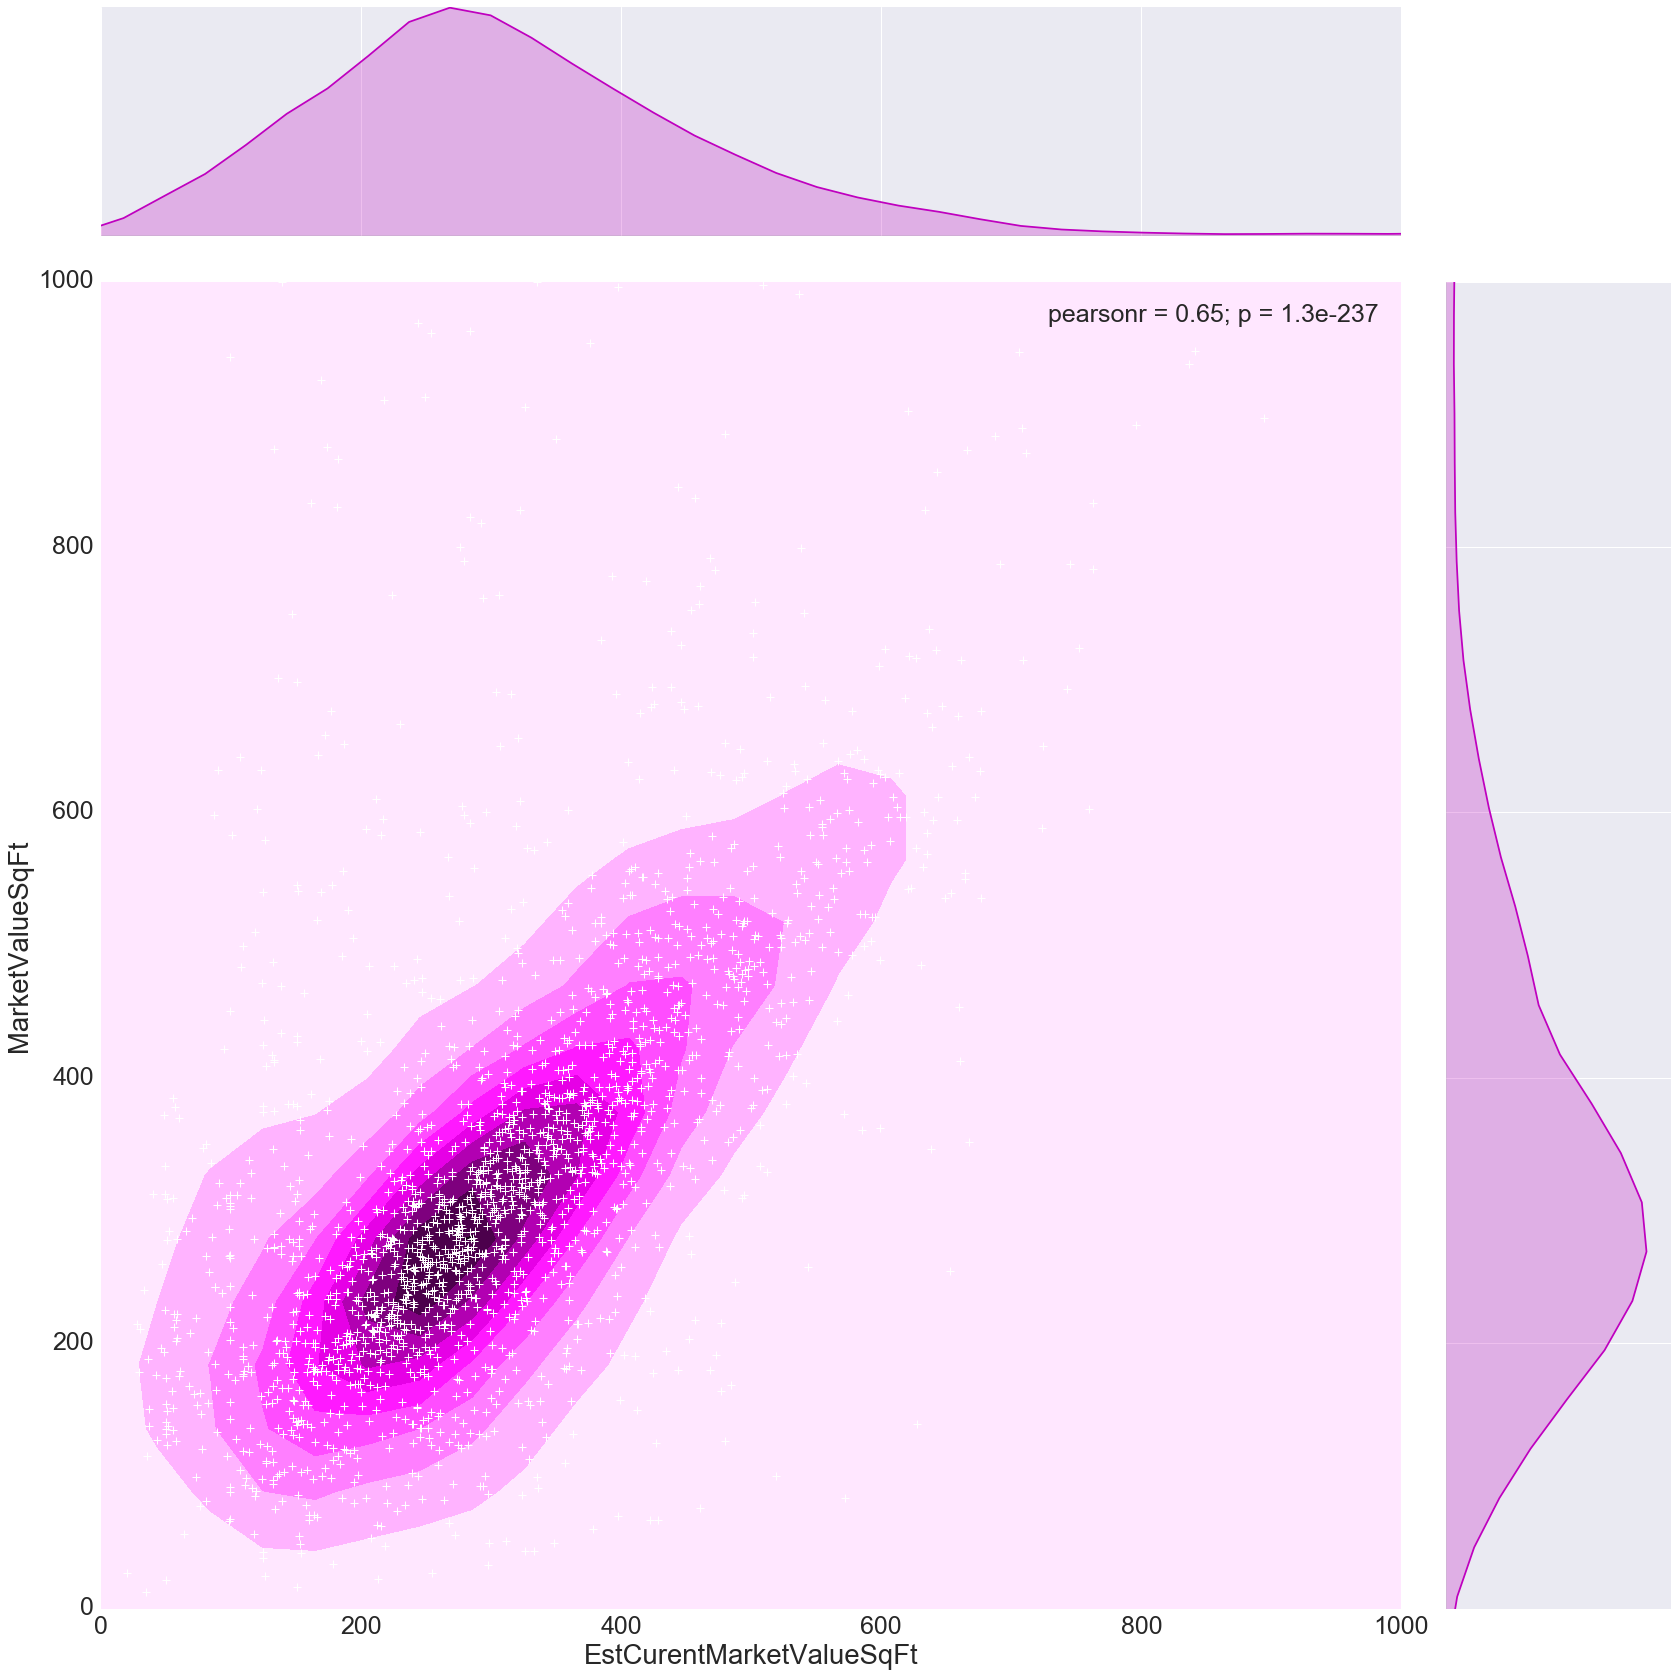

In [62]:
sns.jointplot(x="EstCurentMarketValueSqFt",
              y="MarketValueSqFt",
              data=sales.sample(2000),
              kind="kde",
              color="m",
              size=24,
              xlim=(0, 1000),
              ylim=(0, 1000)).plot_joint(plt.scatter,
                                         c="w",
                                         s=50,
                                         linewidth=1,
                                         marker="+")

`plot_join` is awesome, this code above achieves basically the same effect but reverses what goes on top of what, basically.

## pairplot()

In [66]:
sales.head(1)

,Index,Borough,Block,Lot,SalePrice,LandSquareFeet,MarketValueSqFt,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,LtdHeight,AllZoning1,AllZoning2,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,BuiltCode,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,CurFvT,NewFvT,CuravtA,AssessmentValueSqFt,EstPriorMarketValueSqFt,EstCurentMarketValueSqFt,ValueRatio
0,0,Bronx,2268,18,1800000,2500,221.538462,201,41,1002,7,8,10454,E083,40,4500,2,1,2A,532 EAST 142 STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R6,NaN,N,C1,2,0,P,"HAXHARI, GAC",2500,8125,0,8125,0,0,0,0,0,0,2,1,4,7,7,25,100,0,0,NaN,2,N,5,2,2197,216878,0,0,2015,NaN,0,0,NaN,NaN,3.25,2.43,0,4.8,2,2022680018,0,41,1007305,234328,6a,NaN,209S029,20901,NaN,0,NaN,1,16v1,143700,620769,2035,0.250462,17.686154,76.402338,2.899629


In [68]:
# sales[['YearBuilt', 'NumFloors', 'MarketValueSqFt']]

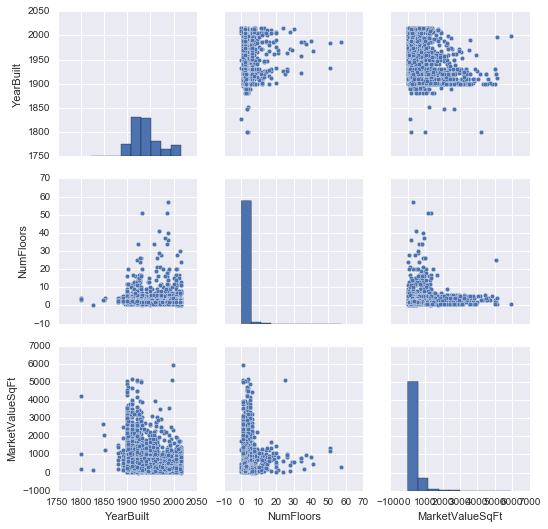

In [75]:
sns.set(font_scale=1)
sns.pairplot(sales[['YearBuilt', 'NumFloors', 'MarketValueSqFt']][sales['YearBuilt'] > 0])